# The ocean Charney instability

The Eady instability is an instability due to the interaction of two
surface modes. We explore the effects of the interior PV gradient by
studying the ocean Charney instability {cite:p}`CapetEtAl_16`. To begin, the
ocean Charney instability is due to interaction between the top boundary
and the interior. From the Charney--Stern--Pedlosky (CSP) condition, we
know that for instability, we need $Q_y$ is the opposite sign to $U_z$
at the upper boundary {cite:p}`Vallis_17` p. 351. For the ocean, there are two
ways for this to happen. For an eastward sheared top mean current
$U_z>0$, we need $Q_y<0$. For this, we need the curvature of the zonal
velocity to overwhelm the positive planetary PV gradient $\beta$. Now if
the top mean current is westward sheared $U_z<0$, we need $Q_y>0$ which
can be provided by the planetary PV gradient $\beta$. Both can happen in
the ocean according to the global study of {cite:p}`TullochEtAl_11`. We study
the linear instability of both scenarios. For that, we ignore the bottom
boundary by setting $b=0$ at $z=-H$.

## Idealized profiles inspired by the ocean

For our preliminary examples to demonstrate Dedalus, we use idealized
nondimensional profiles. Converting the code to take real data would be
simple.

The 3DQG system above only needs stratification $N^2(z)$ and mean
velocity $U(z)$ at vertical profiles as inputs. That is the data our
data will take. We will use exponential stratification 
\begin{align}
    N^2(z) = N^2 e^{z/\delta} \quad\text{w/}\quad \delta=0.2.
\end{align} 
For velocity we use 
\begin{align}
    U(z) = (1+z-\delta)e^{z/\delta}/5.
\end{align}
We scale the velocity so that 
$${\frac{\partial}{\partial z}\left(\frac{f^2}{N^2}\frac{\partial\psi}{\partial z}\right)}=1.$$

## The growth rate and condition for instability

We can calculate the growth rate of the instability under different parameters of $\xi^{-2}$. This is done in the standalone file [`Charney_evalparam.py`](https://github.com/Empyreal092/GFD_in_Dedalus_book/tree/main/3DQG_Linstab/Charney_evalparam.py) since the computation is too expansive to do in a notebook. 

Here we only present the code in the notebook that is a version of [`Charney_evalparam.py`](https://github.com/Empyreal092/GFD_in_Dedalus_book/tree/main/3DQG_Linstab/Charney_evalparam.py) that only perform a subset of the calculation (only a subset of $k$).

In [1]:
import numpy as np
import dedalus.public as d3

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmocean.cm as cmo

plt.style.use('/mnt/c/Ryan_Data/Tools/Python_Tool/ryan_mplstyle.mplstyle')

In [2]:
# Physical Parameters
Ub = 1
delta = 0.2

# Numerics Parameters
Lz = 1
Nz = 256

dtype = np.complex128

# Bases
Lzt, Lzb = 0, -Lz

coords = d3.CartesianCoordinates('z')
dist = d3.Distributor(coords, dtype=dtype)
zbasis = d3.Chebyshev(coords['z'], size=Nz, bounds=(Lzb, Lzt))

In [3]:
# Mean Fields
N2 = dist.Field(bases=zbasis )
U_M = dist.Field(bases=zbasis )
By_M = dist.Field(bases=zbasis )
Qy_M = dist.Field(bases=zbasis )

xin2 = dist.Field( )

# Eigenproblem Fields
q = dist.Field(name='q', bases=zbasis )
bt = dist.Field(name='bt' )
bb = dist.Field(name='bb' )

P0 = dist.Field(name='P0', bases=zbasis )

tau_P0 = dist.Field()
tau_P0t = dist.Field( )
tau_P0b = dist.Field( )

kx = dist.Field(name='kx')
ky = dist.Field(name='ky')
omega = dist.Field()

In [4]:
# Substitutions
dx = lambda A: 1j*kx*A
dy = lambda A: 1j*ky*A
dz = lambda A: d3.Differentiate(A, coords['z'])
dt = lambda A: -1j*omega*A

z = dist.local_grids(zbasis)[0]

lift_basis = zbasis.derivative_basis(2)
lift = lambda A, n: d3.Lift(A, lift_basis, n)

u = -dy(P0)
v =  dx(P0)

ut = u(z=Lzt); vt = v(z=Lzt); 
ub = u(z=Lzb); vb = v(z=Lzb); 

By_Mt = By_M(z=Lzt); By_Mb = By_M(z=Lzb)
U_Mt = U_M(z=Lzt);   U_Mb = U_M(z=Lzb)

lap = lambda A: dx(dx(A))+dy(dy(A))

[1.+0.j]
2025-06-12 16:03:43,042 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 9.2e+01/s
2025-06-12 16:03:43,462 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 2.8e+00/s
2025-06-12 16:03:45,196 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 3.0e+01/s
[0.5+0.j]
2025-06-12 16:03:46,966 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 1.9e+02/s
2025-06-12 16:03:47,009 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 3.3e+01/s
2025-06-12 16:03:49,249 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 3.1e+01/s
[0.+0.j]
2025-06-12 16:03:51,404 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 1.7e+02/s
2025-06-12 16:03:51,449 subsystems 0/1 INFO :: B

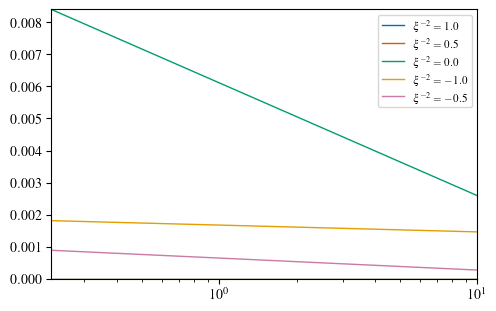

In [5]:
# The physical variables inputted
N2['g'] = np.exp(z/delta)
U_M['g'] = (1+z-delta)*np.exp(z/delta)/5

fig=plt.figure(1,figsize=(5.5, 3.5))

xin2_ary = [1,1/2,0,-1,-1/2]

for xin in xin2_ary:
    xin2['g'] = xin
    print(xin2['g'])

    # Problem
    problem_mean = d3.LBVP([By_M, Qy_M], namespace=locals())

    problem_mean.add_equation("By_M = -dz(U_M)")
    problem_mean.add_equation("Qy_M = xin2-Ub*dz(1/N2*dz(U_M))")
    
    # Solver
    solver_mean = problem_mean.build_solver()
    solver_mean.solve()
    Qy_M['g'] = Qy_M['g'][int(Nz/2)] # fix noise in taking derivatives
    
    #####################
    # Problem
    problem = d3.EVP([P0, tau_P0t, tau_P0b, \
                      q, bt\
                      ], eigenvalue=omega, namespace=locals())

    problem.add_equation("lap(P0) + Ub*dz( 1/N2*dz(P0) ) + lift(tau_P0t,-1) + lift(tau_P0b,-2) - q = 0")
    problem.add_equation("dz(P0)(z=Lzt) - bt = 0"); problem.add_equation("dz(P0)(z=Lzb) - 0 = 0")

    problem.add_equation("dt(bt) + U_Mt*dx(bt) + vt*By_Mt = 0")
    problem.add_equation("dt(q) + U_M*dx(q) + v*Qy_M = 0")
    
    # Solver
    # Charney_evalparam.py scans through np.exp(np.arange(-1.5,4,0.05)) instead
    k_ary = np.exp([-1.5, 4])
    grow_ary = np.empty([k_ary.size])
    c_ary_1 = np.empty([k_ary.size], dtype=complex)
    c_ary_2 = np.empty([k_ary.size], dtype=complex)

    for ix in range(k_ary.size):
        kx['g'] = k_ary[ix]; ky['g'] = 0

        solver = problem.build_solver()
        solver.solve_dense(solver.subproblems[0], rebuild_matrices=True)
        evals = solver.eigenvalues
        # print(evals.shape)

        e_loc = np.argmax(np.imag(evals))
        grow_ary[ix] = np.imag(evals[e_loc])
   
    fig = plt.figure(1)
    plt.semilogx(k_ary,grow_ary,label=r"$\xi^{-2}=%.1f$" %np.real(xin2['g'][0]))

fig = plt.figure(1)
plt.legend()
plt.xlim(np.exp(-1.5),10)

plt.show()

[`Charney_evalparam.py`](https://github.com/Empyreal092/GFD_in_Dedalus_book/tree/main/3DQG_Linstab/Charney_evalparam.py) saves the growth rate as a function of $k$ in `figs/`. 

![](./figs/Charney_evalparam.png)

It is worth noting the location of the longwave cut-off of the instability. In our nondimensionalization, the velocity is fixed. To
compare the different cases of velocity shear, we flip the sign of
$\beta$ instead by using different signs of $\xi^{-2}$. To satisfy the
CSP condition, we always need 
\begin{align}
    Q_y = \{\xi^{-2}\}-1<0.
\end{align} 
Therefore we need 
\begin{align}
    \{\xi^{-2}\}<1.
\end{align} 
Note that this means all westward mean velocity is
unstable, while eastward velocity has to be strong enough to be
unstable. This matches our intuition.

## Instability profiles

We pick the two cases of $\{\xi^{-2}\}=\pm0.5$ to look at the profile of
the instability. Note that $\{\xi^{-2}\}$ is eastward. We first plot the magnitude of the eigenvector
of the fastest growing mode, a common value of interest for baroclinic
instability. 

In [6]:
# Physical Parameters
xin2['g'] = 0.5

#
P0_evec_ary = np.empty((2,Nz), dtype=dtype)
# Saved from parametric scan on k
k_max_ary = np.array([4.24,4.81])
sign_ary = np.array([1,-1])
for idx in range(sign_ary.size):
    U_M['g'] = sign_ary[idx]*(1+z-delta)*np.exp(z/delta)/5
    
    # # Solver
    solver_mean = problem_mean.build_solver()
    solver_mean.solve()
    Qy_M['g'] = Qy_M['g'][int(Nz/2)] # fix noise in taking derivatives
    
    # #####################  
    k_max = k_max_ary[idx]
    kx['g'] = k_max; ky['g'] = 0

    solver = problem.build_solver()
    solver.solve_dense(solver.subproblems[0], rebuild_matrices=True)
    evals = solver.eigenvalues
    loc_grow = np.argmax(np.imag(evals))    
    
    solver.set_state(loc_grow,0)
    P0_evec_ary[idx] = solver.state[0]['g'] # index 0 because P0 is the first element of the d3.EVP statement

2025-06-12 16:04:04,589 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 1.4e+02/s
2025-06-12 16:04:04,630 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 2.7e+01/s
2025-06-12 16:04:06,837 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 2.2e+02/s
2025-06-12 16:04:06,872 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 3.1e+01/s


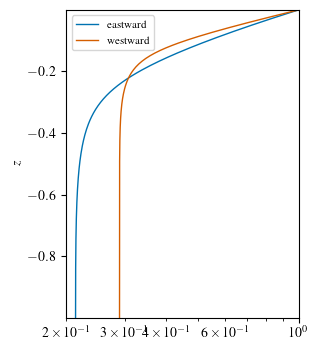

In [7]:
fig=plt.figure(1,figsize=(3, 4))
text_ary = ["eastward","westward"]

for idx in range(2):
    # plot
    fig=plt.figure(1)
    plt.semilogx(np.abs(P0_evec_ary[idx])/np.abs(P0_evec_ary[idx,-1]),z,label=text_ary[idx])

fig = plt.figure(1)
plt.legend()
plt.ylabel("$z$")
plt.xlim(0.2,1)

plt.show()

Then we show some physical
variables of the most unstable wavenumber for the eastward and westward case, respectively. We see that the streamfunctions $\psi$ and
meridional velocity $v$ lean against the mean flow (note that for these
two plots, we actually reserve the mean flow and keep $\beta$
unchanged). They are also out of phase, typical of baroclinic
instability.

2025-06-12 16:04:09,195 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 1.5e+02/s


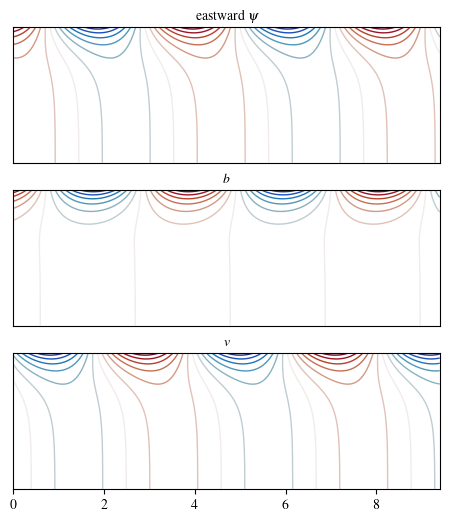

2025-06-12 16:04:09,356 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 1.2e+02/s


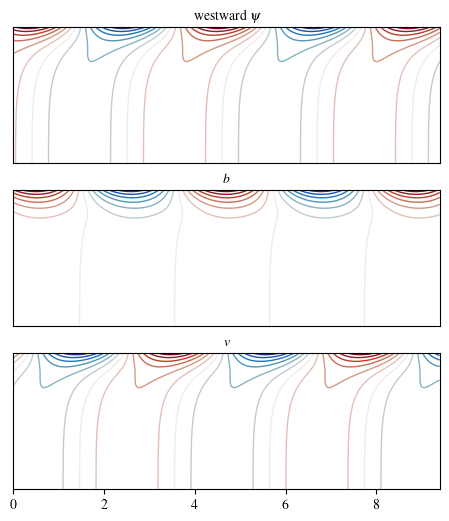

In [8]:
b = dist.Field(bases=zbasis )
v = dist.Field(bases=zbasis )

x = np.arange(0,3*np.pi,0.05)
phs_corr = np.exp(1j*1.5*x)

# Problem
problem_morefields = d3.LBVP([v, b], namespace=locals())

problem_morefields.add_equation("v = dx(P0)")
problem_morefields.add_equation("b = dz(P0)")

for idx in range(2):
    P0['g'] = P0_evec_ary[idx]/np.abs(P0_evec_ary[idx][-1])
    
    # Solver
    solver_morefields = problem_morefields.build_solver()
    solver_morefields.solve()

    # Plotting
    fig=plt.figure(figsize=(5.5,6))

    plt.subplot(3,1,1)
    P0eig_mat = np.outer(P0['g'],phs_corr)
    plt.contour(x,z,P0eig_mat.real, 14, cmap=cmo.balance, norm=colors.CenteredNorm())
    plt.xticks([]); plt.yticks([])
    plt.title(text_ary[idx]+ r" $\psi$")
    
    plt.subplot(3,1,2)
    beig_mat = np.outer(b['g'],phs_corr)/np.max(np.abs(b['g']).ravel())
    plt.contour(x,z,beig_mat.real, 14, cmap=cmo.balance, norm=colors.CenteredNorm())
    plt.xticks([]); plt.yticks([])
    plt.title(r"$b$")
    
    plt.subplot(3,1,3)
    veig_mat = np.outer(v['g'],phs_corr)/np.max(np.abs(v['g']).ravel())
    plt.contour(x,z,veig_mat.real, 14, cmap=cmo.balance, norm=colors.CenteredNorm())
    plt.yticks([])
    plt.title(r"$v$")
    
    plt.show()